In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")

df_serial = df[df['ntreads'] == 1] 

# Merge to include serial execution time for each row
df = df.merge(df_serial[['n', 'seconds']], on='n', suffixes=('', '_serial'))

df['speedup'] = df['seconds_serial'] / df['seconds']
df['efficiency'] = df['speedup'] / 4 # since I have 4 cores on my laptop

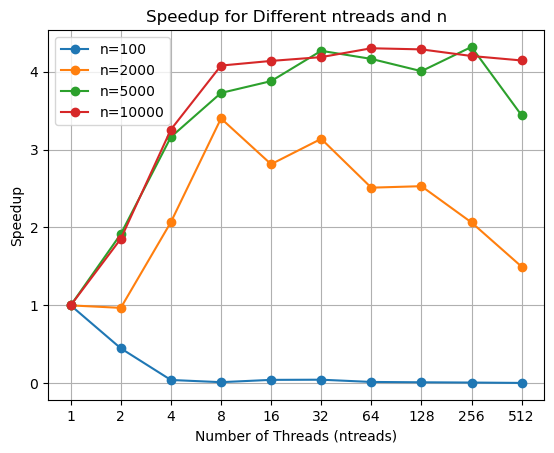

In [30]:
for i, (n, group) in enumerate(df.groupby('n')):
    plt.plot(group['ntreads'], group['speedup'], label=f'n={n}', marker='o')

plt.title('Speedup for Different ntreads and n')
plt.ylabel('Speedup')
plt.xlabel('Number of Threads (ntreads)')
plt.xscale('log', base=2)

plt.xticks(df["ntreads"].unique(), df["ntreads"].unique())
    
plt.legend()
plt.grid(True)
plt.show()

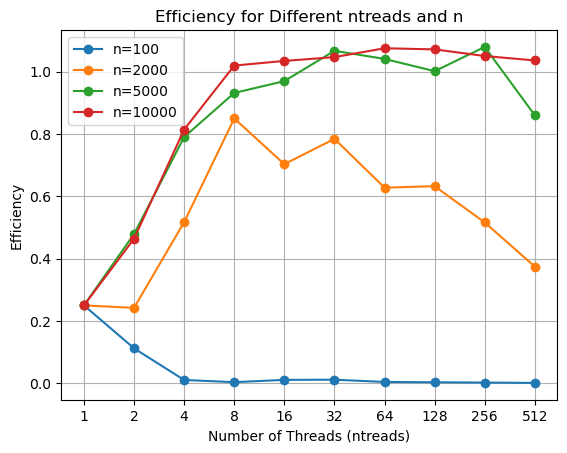

In [31]:
for i, (n, group) in enumerate(df.groupby('n')):
    plt.plot(group['ntreads'], group['efficiency'], label=f'n={n}', marker='o')

plt.title('Efficiency for Different ntreads and n')
plt.ylabel('Efficiency')
plt.xlabel('Number of Threads (ntreads)')
plt.xscale('log', base=2)

plt.xticks(df["ntreads"].unique(), df["ntreads"].unique())

plt.legend()
plt.grid(True)
plt.show()

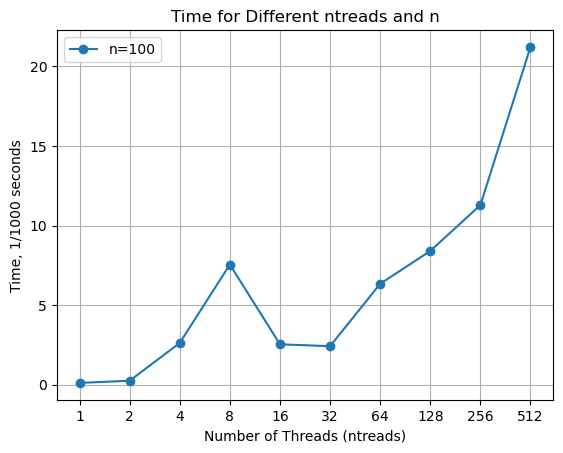

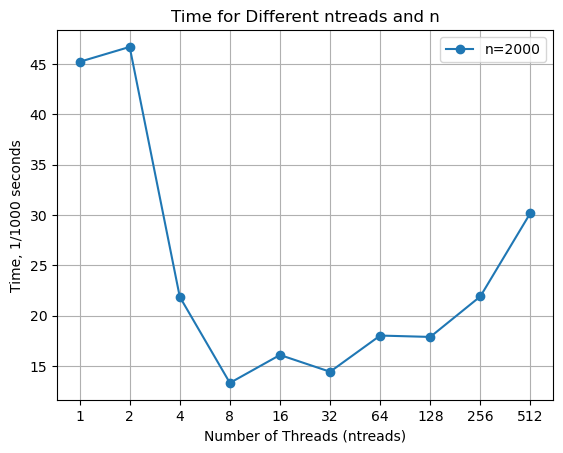

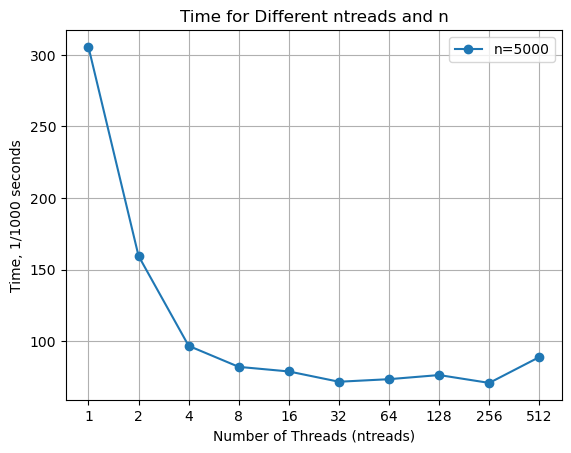

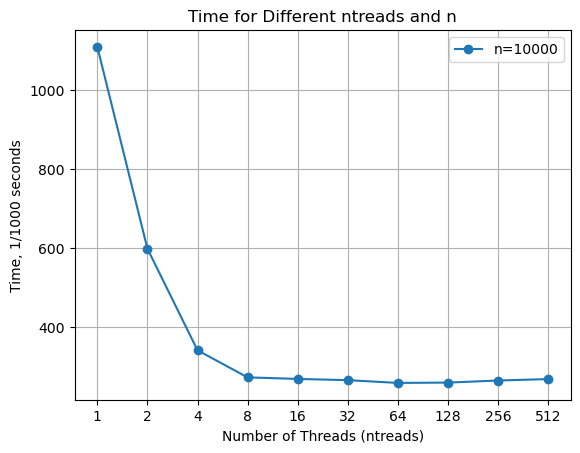

In [32]:
for i, (n, group) in enumerate(df.groupby('n')):
    plt.figure(figsize=(10, 6))
    plt.title('Time for Different ntreads and n')
    plt.plot(group['ntreads'], 1e3*group['seconds'], label=f'n={n}', marker='o')
    plt.ylabel('Time, 1/1000 seconds')
    plt.xlabel('Number of Threads (ntreads)')
    plt.xscale('log', base=2)
    plt.xticks(df["ntreads"].unique(), df["ntreads"].unique())
    plt.grid(True)
    plt.legend()
    plt.show()

In [25]:
for i, (n, group) in enumerate(df.groupby('n')):
    group.to_csv(f"output_n_{n}.csv", index=False)